<a href="https://colab.research.google.com/github/tiesen243/machine-learing-from-scratch/blob/main/src/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align='center'>Logistic Regression</h1>

## Import libraries

In [8]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

## Model

### Utils

In [9]:
def softmax(z: np.ndarray) -> np.ndarray:
    """
    Compute the softmax of vector z

    Parameters
    ----------
    z : np.ndarray
        A vector of shape (N, C) where N is the number of samples and C is the number of classes

    Returns
    -------
    np.ndarray
        A vector of shape (N, C) where each row is a probability distribution over C classes
    """
    return np.exp(z) / np.sum(np.exp(z), axis=1).reshape(-1, 1)

In [10]:
def cross_entropy(y: np.ndarray, probs: np.ndarray):
    """
    Compute the cross entropy loss

    Parameters
    ----------
    y : np.ndarray
        A vector of shape (N, C) where N is the number of samples and C is the number of classes
        Each row is a one-hot encoded vector
    probs : np.ndarray
        A vector of shape (N, C) where N is the number of samples and C is the number of classes
        Each row is a probability distribution over C classes

    Returns
    -------
    float
        The cross entropy loss
    """
    return -1 * np.mean(y * np.log(probs))

In [11]:
def one_hot(y: np.ndarray) -> np.ndarray:
    """
    One-hot encode the target vector

    Parameters
    ----------
    y : np.ndarray
        A vector of shape (N,) where N is the number of samples

    Returns
    -------
    np.ndarray
        A matrix of shape (N, C) where C is the number of classes
    """
    return np.eye(len(np.unique(y)))[y]

### Logistic Regression class

In [12]:
class LogisticRegression:
    def __init__(self, lr: float = 0.001) -> None:
        """
        Initialize the model.

        Parameters
        ----------
        lr : float, optional
            The learning rate of the model, by default 0.001.
        """
        self.lr = lr

        self.weights: np.ndarray
        self.bias: np.ndarray

        self.loss: list = []
        self.accuracy: list = []

    def fit(
        self,
        X: np.ndarray,
        y: np.ndarray,
        n_iter: int = 1000,
        seed: int = 69,
        verbose: bool = False,
    ) -> None:
        """
        Fit the model to the data.

        Parameters
        ----------
        X : np.ndarray
            The input data.
        y : np.ndarray
            The target data.
        n_iter : int, optional
            The number of iterations to train the model, by default 1000.
        seed : int, optional
            The random seed to use, by default 69.
        verbose : bool, optional
            Whether to print the loss and accuracy of the model during training, by default False.
        """
        np.random.seed(seed)

        n_samples, n_features = X.shape
        n_classes = len(np.unique(y))

        self.weights = np.zeros((n_features, n_classes))
        self.bias = np.zeros(n_classes)

        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

        for i in range(n_iter):
            y_pred = self.predict_proba(X_train)

            self.loss.append(cross_entropy(one_hot(y_train), y_pred))
            self.accuracy.append(self.score(X_val, y_val))

            error = y_pred - one_hot(y_train)
            dw = (1 / n_samples) * np.dot(X_train.T, error)
            db = (1 / n_samples) * np.sum(error)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            if verbose and i % 100 == 0:
                print(
                    f"Epoch {i}: Loss = {self.loss[-1]:.4f}, Accuracy = {self.accuracy[-1]:.4f}"
                )

    def predict_proba(self, X: np.ndarray) -> np.ndarray:
        """
        Predict the probability of each class for each sample.

        Parameters
        ----------
        X : np.ndarray
            The input data.

        Returns
        -------
        np.ndarray
            The predicted probabilities.
        """
        y_pred = np.dot(X, self.weights) + self.bias
        return softmax(y_pred)

    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        Predict the class of each sample.

        Parameters
        ----------
        X : np.ndarray
            The input data.

        Returns
        -------
        np.ndarray
            The predicted classes.
        """
        return np.argmax(self.predict_proba(X), axis=1)

    def score(self, X: np.ndarray, y: np.ndarray):
        """
        Compute the accuracy of the model.

        Parameters
        ----------
        X : np.ndarray
            The input data.
        y : np.ndarray
            The target data.

        Returns
        -------
        float
            The accuracy of the model.
        """
        return np.mean(self.predict(X) == y)

    def save(self, path: str = "model.npz") -> None:
        """
        Save the model to a file.

        Parameters
        ----------
        path : str, optional
            The path to save the model to, by default 'model.npz'.
        """
        np.savez(
            path,
            weights=self.weights,
            bias=self.bias,
            loss=self.loss,
            accuracy=self.accuracy,
        )

    def load(self, path: str = "model.npz") -> None:
        """
        Load the model from a file.

        Parameters
        ----------
        path : str, optional
            The path to load the model from, by default 'model.npz'.
        """
        data = np.load(path)
        self.weights = data["weights"]
        self.bias = data["bias"]
        self.loss = data["loss"].tolist()
        self.accuracy = data["accuracy"].tolist()

## Train model

In [13]:
X, y = load_iris(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=69
)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(f"Numbers of classes: {len(np.unique(y))}")

(120, 4) (30, 4) (120,) (30,)
Numbers of classes: 3


In [14]:
model = LogisticRegression()
model.fit(X_train, y_train, seed=71, verbose=True)

Epoch 0: Loss = 0.3662, Accuracy = 0.2083
Epoch 100: Loss = 0.3471, Accuracy = 0.7500
Epoch 200: Loss = 0.3313, Accuracy = 0.7917
Epoch 300: Loss = 0.3173, Accuracy = 0.7500
Epoch 400: Loss = 0.3047, Accuracy = 0.7500
Epoch 500: Loss = 0.2934, Accuracy = 0.7500
Epoch 600: Loss = 0.2832, Accuracy = 0.7500
Epoch 700: Loss = 0.2740, Accuracy = 0.7500
Epoch 800: Loss = 0.2657, Accuracy = 0.7500
Epoch 900: Loss = 0.2582, Accuracy = 0.7500


In [15]:
score = model.score(X_test, y_test)
print(f"Test accuracy: {score:.4f}")

Test accuracy: 0.8667


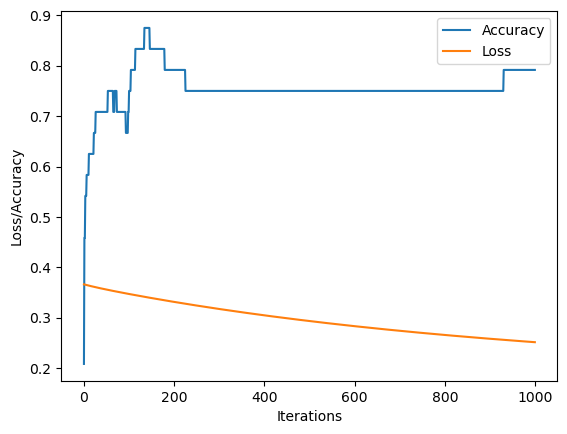

In [16]:
plt.plot(model.accuracy, label="Accuracy")
plt.plot(model.loss, label="Loss")
plt.ylabel("Loss/Accuracy")
plt.xlabel("Iterations")
plt.legend()
plt.show()